In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Leer Dataframe
df = pd.read_csv(r'.\Mental_Health_Lifestyle_Dataset.csv')

In [3]:
df

Country  Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0        Brazil   48    Male            Low  Vegetarian          6.3   
1     Australia   31    Male       Moderate       Vegan          4.9   
2         Japan   37  Female            Low  Vegetarian          7.2   
3        Brazil   35    Male            Low       Vegan          7.2   
4       Germany   46    Male            Low    Balanced          7.3   
...         ...  ...     ...            ...         ...          ...   
2995      Japan   57  Female       Moderate    Balanced          7.0   
2996  Australia   27    Male            Low   Junk Food          7.1   
2997  Australia   42    Male       Moderate    Balanced          6.0   
2998  Australia   25    Male           High        Keto          5.7   
2999      Japan   28  Female           High       Vegan          6.9   

     Stress Level Mental Health Condition  Work Hours per Week  \
0             Low                     NaN                   21   
1             Low                    PTSD                   48   
2            High                     NaN                   43   
3             Low              Depression                   43   
4             Low                 Anxiety                   35   
...           ...                     ...                  ...   
2995         High              Depression                   29   
2996          Low                     NaN                   47   
2997         High              Depression                   23   
2998          Low                 Anxiety                   51   
2999         High              Depression                   41   

      Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
0                             4.0                       7.8              6.5  
1                             5.2                       8.2              6.8  
2                             4.7                       9.6              9.7  
3                             2.2                       8.2              6.6  
4                             3.6                       4.7              4.4  
...                           ...                       ...              ...  
2995                          4.4                       9.7              5.9  
2996                          7.4                       6.3              9.9  
2997                          3.9                       5.2              4.1  
2998                          4.3                       5.9              4.1  
2999                          6.7                       8.3              2.2  

[3000 rows x 12 columns]

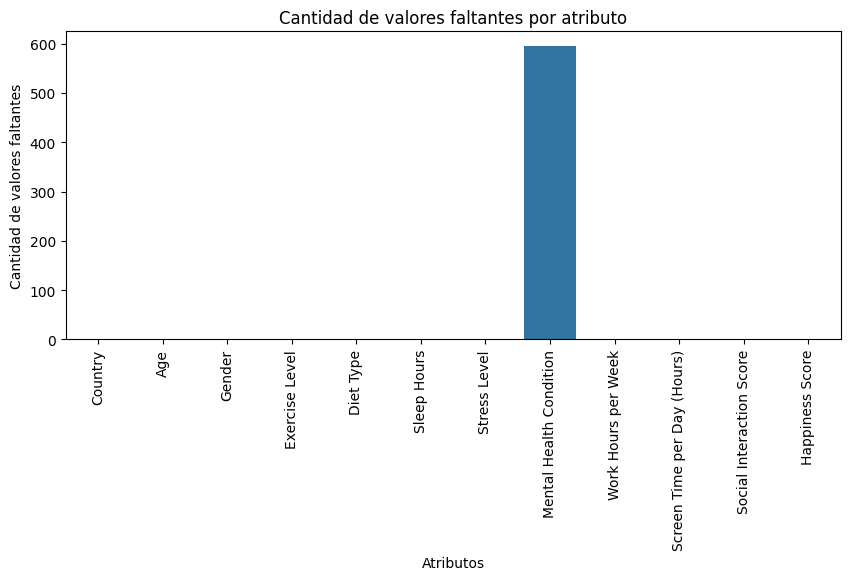

In [4]:
# Contar datos faltantes del dataset y graficarlos
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 4))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Cantidad de valores faltantes por atributo')
plt.xlabel('Atributos')
plt.ylabel('Cantidad de valores faltantes')
plt.show()


In [5]:
# Crear una nueva clase "None" que agrupa a los valores faltantes de Mental Health Condition
df['Mental Health Condition'] = df['Mental Health Condition'].fillna('None')
# Contar cuantos valores faltantes hay en total en el df
missing_values = df.isnull().sum().sum()
print(f'Cantidad de valores faltantes en el dataset: {missing_values}')

Cantidad de valores faltantes en el dataset: 0


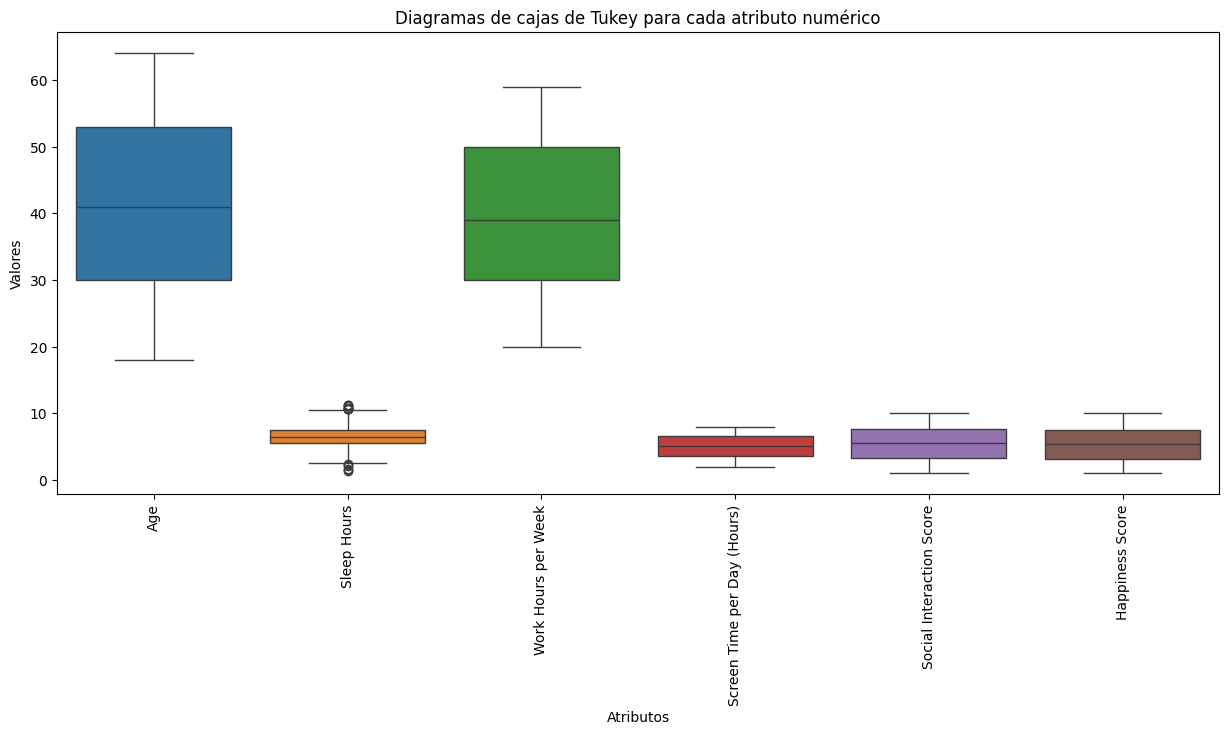

In [6]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

# Crear el boxplot para todos los atributos numéricos en un solo gráfico
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Diagramas de cajas de Tukey para cada atributo numérico')
plt.xlabel('Atributos')
plt.ylabel('Valores')
plt.show()

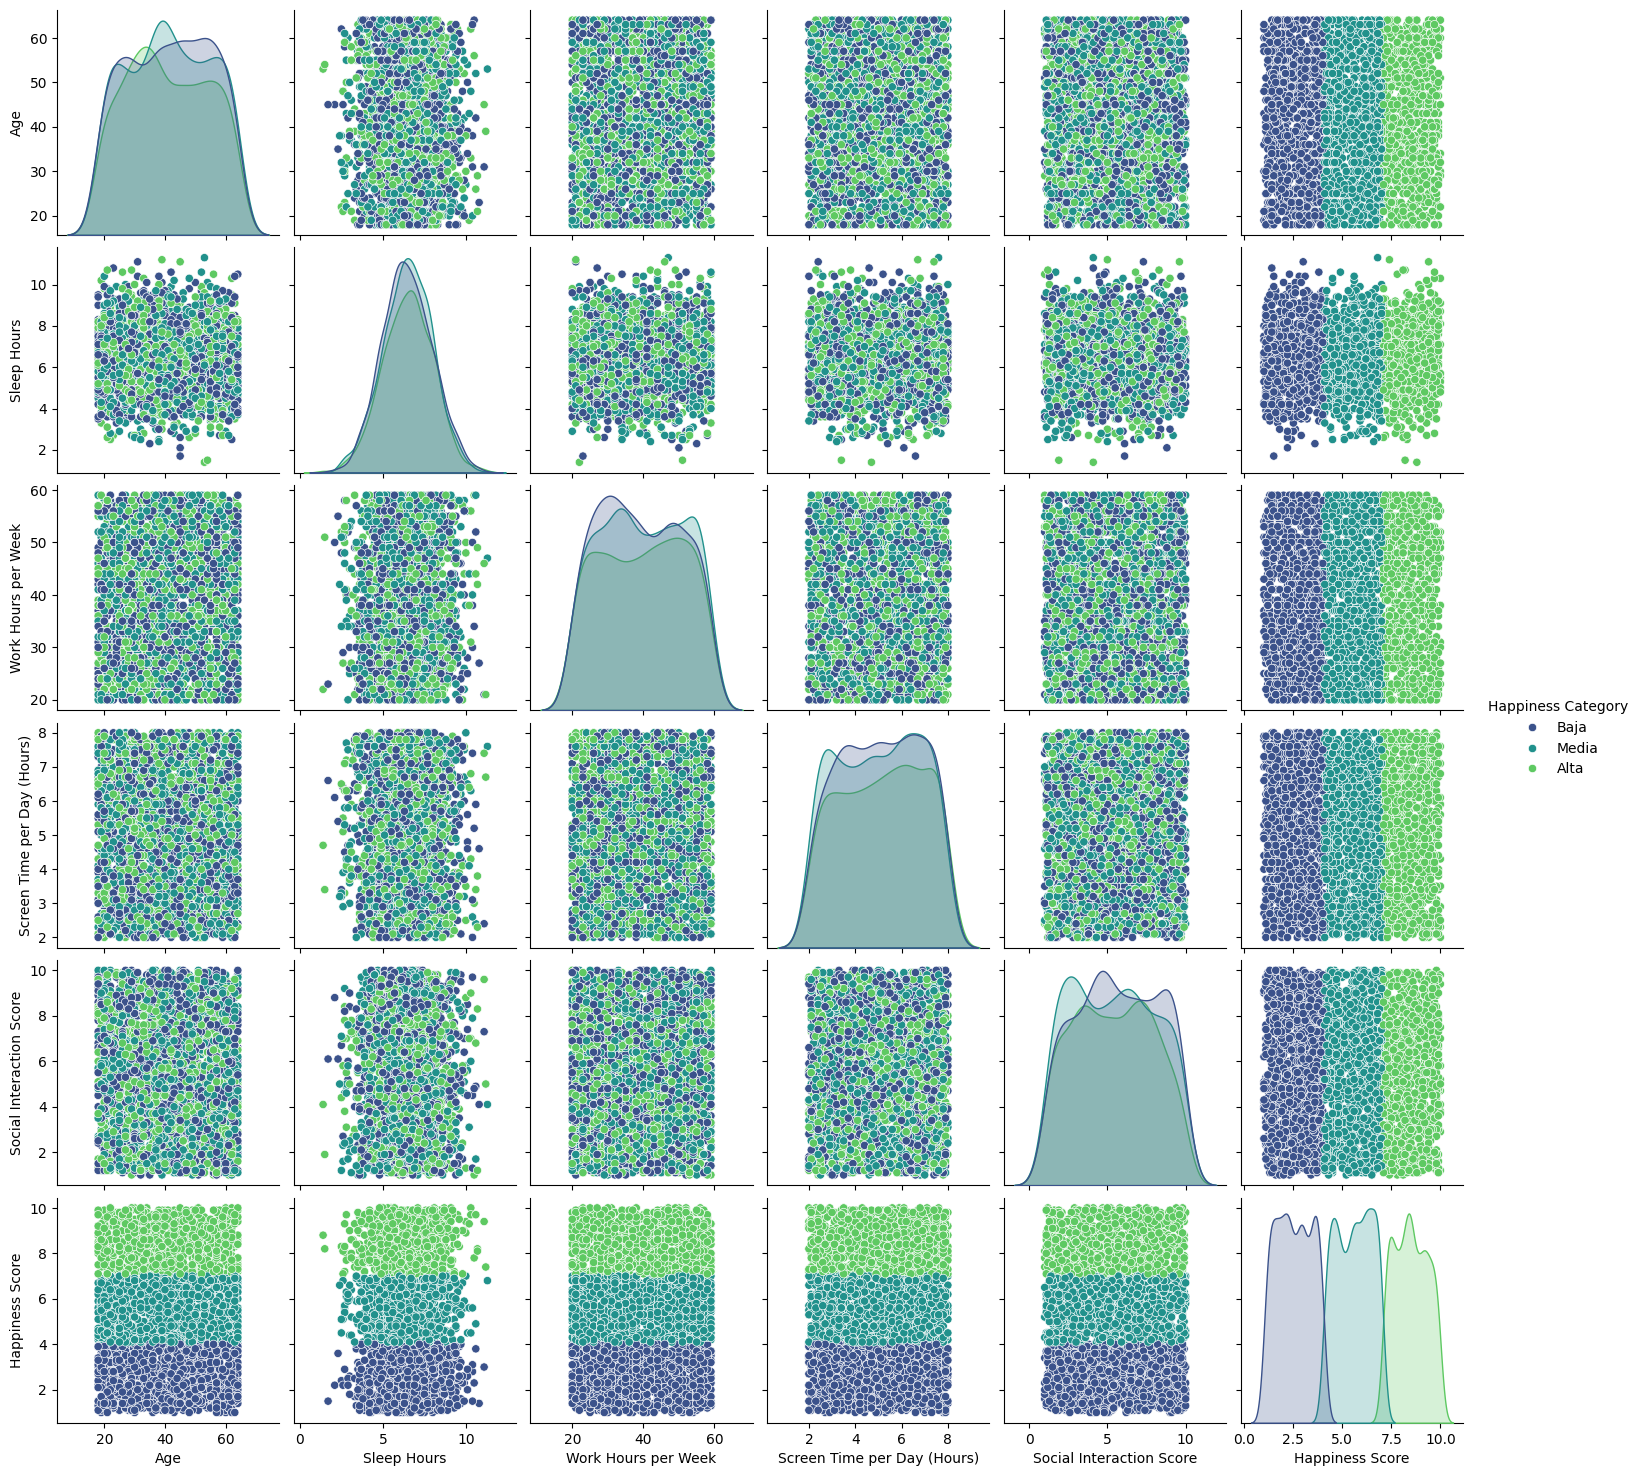

In [7]:

# Crear una columna categórica para 'Happiness Score' (por ejemplo, baja, media, alta)
df['Happiness Category'] = pd.cut(df['Happiness Score'], bins=3, labels=['Baja', 'Media', 'Alta'])

# Hacer un sns.pairplot para ver la relación entre los atributos numéricos,
# coloreando los puntos según la categoría de 'Happiness Score'
sns.pairplot(df[numeric_cols.tolist() + ['Happiness Category']], hue='Happiness Category', palette='viridis')
plt.show()
# Eliminar la columna categorica de happiunues category para que no interrumpa el resto de los analisis
df.drop(columns=['Happiness Category'], inplace=True)

In [8]:
# 1. Transformar atributos ordinales a valores numéricos
ordinal_map = {'Low': 0, 'Moderate': 0.5, 'High': 1}
df['Exercise Level'] = df['Exercise Level'].map(ordinal_map)
df['Stress Level'] = df['Stress Level'].map(ordinal_map)

# 2. Codificación One-Hot para variables categóricas
df = pd.get_dummies(df, columns=['Gender', 'Diet Type', 'Mental Health Condition'])

# 3. Normalización min-max para variables numéricas seleccionadas
from sklearn.preprocessing import MinMaxScaler

num_vars = ['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']
scaler = MinMaxScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

# 4. Eliminar el atributo 'Country'
if 'Country' in df.columns:
    df = df.drop(columns=['Country'])

# Ahora el DataFrame df tiene 22 atributos numéricos listos para clustering
print(f"Cantidad de atributos finales: {df.shape[1]}")
df.head()

Cantidad de atributos finales: 21


Age  Exercise Level  Sleep Hours  Stress Level  Work Hours per Week  \
0  0.652174             0.0     0.494949           0.0             0.025641   
1  0.282609             0.5     0.353535           0.0             0.717949   
2  0.413043             0.0     0.585859           1.0             0.589744   
3  0.369565             0.0     0.585859           0.0             0.589744   
4  0.608696             0.0     0.595960           0.0             0.384615   

   Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  \
0                     0.333333                  0.755556         0.611111   
1                     0.533333                  0.800000         0.644444   
2                     0.450000                  0.955556         0.966667   
3                     0.033333                  0.800000         0.622222   
4                     0.266667                  0.411111         0.377778   

   Gender_Female  Gender_Male  ...  Diet Type_Balanced  Diet Type_Junk Food  \
0          False         True  ...               False                False   
1          False         True  ...               False                False   
2           True        False  ...               False                False   
3          False         True  ...               False                False   
4          False         True  ...                True                False   

   Diet Type_Keto  Diet Type_Vegan  Diet Type_Vegetarian  \
0           False            False                  True   
1           False             True                 False   
2           False            False                  True   
3           False             True                 False   
4           False            False                 False   

   Mental Health Condition_Anxiety  Mental Health Condition_Bipolar  \
0                            False                            False   
1                            False                            False   
2                            False                            False   
3                            False                            False   
4                             True                            False   

   Mental Health Condition_Depression  Mental Health Condition_None  \
0                               False                          True   
1                               False                         False   
2                               False                          True   
3                                True                         False   
4                               False                         False   

   Mental Health Condition_PTSD  
0                         False  
1                          True  
2                         False  
3                         False  
4                         False  

[5 rows x 21 columns]

# Modelos Predictivos

Accuracy: 0.30833333333333335
              precision    recall  f1-score   support

        Alta       0.26      0.30      0.28       166
        Baja       0.33      0.24      0.28       219
       Media       0.33      0.39      0.36       215

    accuracy                           0.31       600
   macro avg       0.31      0.31      0.30       600
weighted avg       0.31      0.31      0.31       600



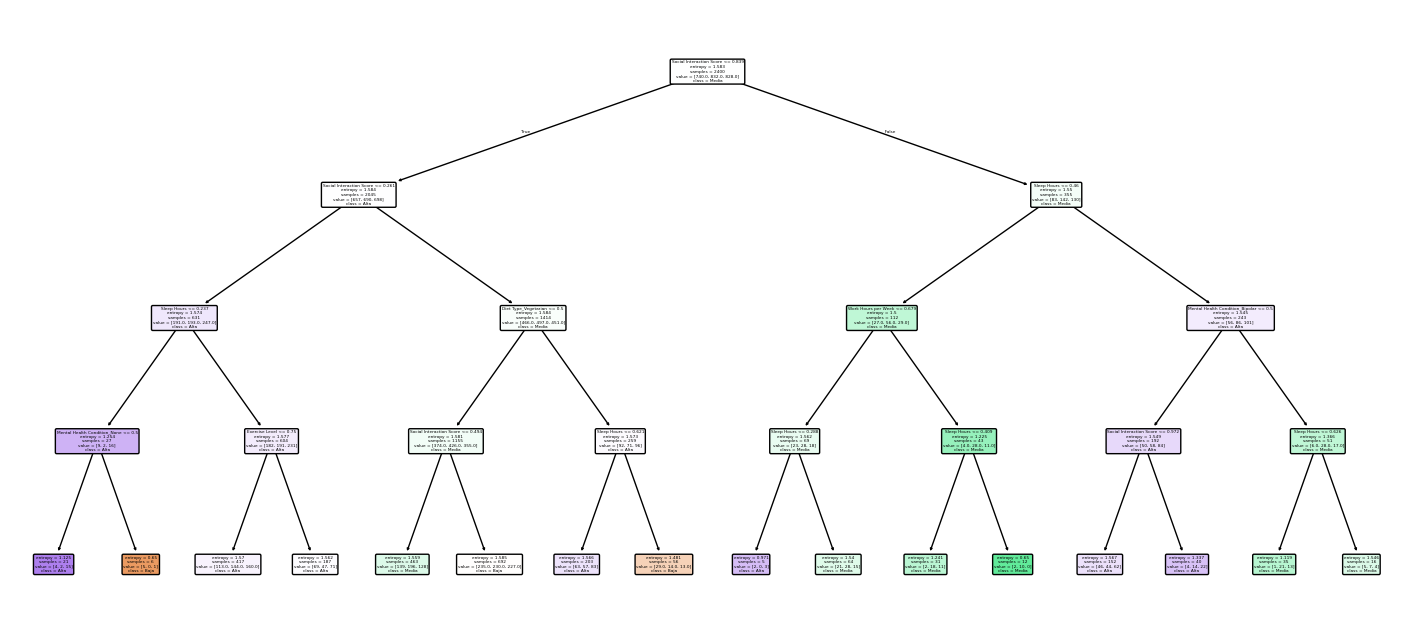

In [9]:

df['Happiness Category'] = pd.cut(df['Happiness Score'], bins=3, labels=['Baja', 'Media', 'Alta'])
X = df.drop(columns=['Happiness Score', 'Happiness Category'])
y = df['Happiness Category']

# Separar en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

# Entrenar el árbol de decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(random_state=99,
                             max_depth=4,
                             min_samples_split=5,
                             min_samples_leaf=5,
                             criterion='entropy',)
clf.fit(X_train, y_train)

# Evaluar el modelo
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualizar el árbol
plt.figure(figsize=(18, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Baja', 'Media', 'Alta'], filled=True, rounded=True)
plt.show()

# Eliminar la columna auxiliar para no afectar otros análisis
#df.drop(columns=['Happiness Category'], inplace=True)

Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 100, 'min_samples_split': 10}
Mejor accuracy en validación cruzada: 0.3203876893534488
Accuracy en test: 0.305
              precision    recall  f1-score   support

        Alta       0.28      0.36      0.31       166
        Baja       0.32      0.36      0.34       219
       Media       0.32      0.21      0.25       215

    accuracy                           0.30       600
   macro avg       0.31      0.31      0.30       600
weighted avg       0.31      0.30      0.30       600



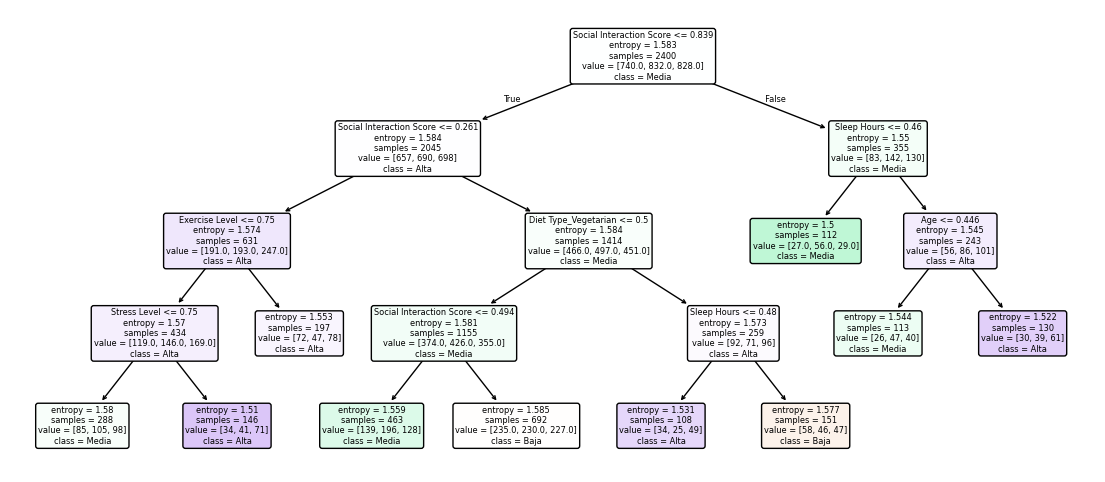

Age: 0.055
Exercise Level: 0.105
Sleep Hours: 0.195
Stress Level: 0.112
Work Hours per Week: 0.000
Screen Time per Day (Hours): 0.000
Social Interaction Score: 0.417
Gender_Female: 0.000
Gender_Male: 0.000
Gender_Other: 0.000
Diet Type_Balanced: 0.000
Diet Type_Junk Food: 0.000
Diet Type_Keto: 0.000
Diet Type_Vegan: 0.000
Diet Type_Vegetarian: 0.116
Mental Health Condition_Anxiety: 0.000
Mental Health Condition_Bipolar: 0.000
Mental Health Condition_Depression: 0.000
Mental Health Condition_None: 0.000
Mental Health Condition_PTSD: 0.000


In [10]:
from sklearn.model_selection import GridSearchCV

# Definir el árbol base
tree = DecisionTreeClassifier(random_state=33)

# Definir la grilla de hiperparámetros a probar
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [10, 20, 100,1000, 10000],
    'min_samples_leaf': [5, 10, 100, 1000, 10000 ],
    'criterion': ['gini', 'entropy']
}

# Búsqueda en grilla con validación cruzada
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor accuracy en validación cruzada:", grid_search.best_score_)

# Entrenar el mejor modelo encontrado
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
print("Accuracy en test:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualizar el árbol óptimo
plt.figure(figsize=(14, 6))
plot_tree(best_tree, feature_names=X.columns, class_names=['Baja', 'Media', 'Alta'], filled=True, rounded=True)
plt.show()

importances = best_tree.feature_importances_
for name, imp in zip(X.columns, importances):
    print(f"{name}: {imp:.3f}")

Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 100, 'min_samples_split': 5}
Mejor f1_macro en validación cruzada: 0.3203876893534488
Accuracy en test: 0.305
              precision    recall  f1-score   support

        Alta       0.28      0.36      0.31       166
        Baja       0.32      0.36      0.34       219
       Media       0.32      0.21      0.25       215

    accuracy                           0.30       600
   macro avg       0.31      0.31      0.30       600
weighted avg       0.31      0.30      0.30       600



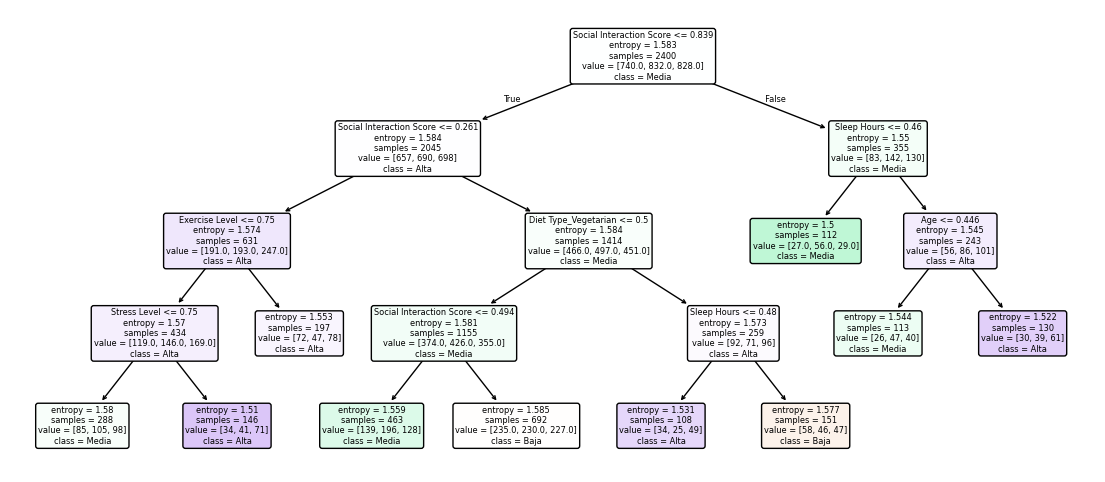

Importancias de atributos:
Age: 0.055
Exercise Level: 0.105
Sleep Hours: 0.195
Stress Level: 0.112
Work Hours per Week: 0.000
Screen Time per Day (Hours): 0.000
Social Interaction Score: 0.417
Gender_Female: 0.000
Gender_Male: 0.000
Gender_Other: 0.000
Diet Type_Balanced: 0.000
Diet Type_Junk Food: 0.000
Diet Type_Keto: 0.000
Diet Type_Vegan: 0.000
Diet Type_Vegetarian: 0.116
Mental Health Condition_Anxiety: 0.000
Mental Health Condition_Bipolar: 0.000
Mental Health Condition_Depression: 0.000
Mental Health Condition_None: 0.000
Mental Health Condition_PTSD: 0.000


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [5, 10, 100, 1000, 10000],
    'min_samples_leaf': [5, 10, 100, 1000, 10000],
    'criterion': ['gini', 'entropy']
}

tree = DecisionTreeClassifier(random_state=99)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor f1_macro en validación cruzada:", grid_search.best_score_)

best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
print("Accuracy en test:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Visualizar el árbol óptimo
plt.figure(figsize=(14, 6))
plot_tree(best_tree, feature_names=X.columns, class_names=['Baja', 'Media', 'Alta'], filled=True, rounded=True)
plt.show()

# Printear importancias de atributos
print( "Importancias de atributos:")
importances = best_tree.feature_importances_
for name, imp in zip(X.columns, importances):
    print(f"{name}: {imp:.3f}")

In [12]:
df

Age  Exercise Level  Sleep Hours  Stress Level  \
0     0.652174             0.0     0.494949           0.0   
1     0.282609             0.5     0.353535           0.0   
2     0.413043             0.0     0.585859           1.0   
3     0.369565             0.0     0.585859           0.0   
4     0.608696             0.0     0.595960           0.0   
...        ...             ...          ...           ...   
2995  0.847826             0.5     0.565657           1.0   
2996  0.195652             0.0     0.575758           0.0   
2997  0.521739             0.5     0.464646           1.0   
2998  0.152174             1.0     0.434343           0.0   
2999  0.217391             1.0     0.555556           1.0   

      Work Hours per Week  Screen Time per Day (Hours)  \
0                0.025641                     0.333333   
1                0.717949                     0.533333   
2                0.589744                     0.450000   
3                0.589744                     0.033333   
4                0.384615                     0.266667   
...                   ...                          ...   
2995             0.230769                     0.400000   
2996             0.692308                     0.900000   
2997             0.076923                     0.316667   
2998             0.794872                     0.383333   
2999             0.538462                     0.783333   

      Social Interaction Score  Happiness Score  Gender_Female  Gender_Male  \
0                     0.755556         0.611111          False         True   
1                     0.800000         0.644444          False         True   
2                     0.955556         0.966667           True        False   
3                     0.800000         0.622222          False         True   
4                     0.411111         0.377778          False         True   
...                        ...              ...            ...          ...   
2995                  0.966667         0.544444           True        False   
2996                  0.588889         0.988889          False         True   
2997                  0.466667         0.344444          False         True   
2998                  0.544444         0.344444          False         True   
2999                  0.811111         0.133333           True        False   

      ...  Diet Type_Junk Food  Diet Type_Keto  Diet Type_Vegan  \
0     ...                False           False            False   
1     ...                False           False             True   
2     ...                False           False            False   
3     ...                False           False             True   
4     ...                False           False            False   
...   ...                  ...             ...              ...   
2995  ...                False           False            False   
2996  ...                 True           False            False   
2997  ...                False           False            False   
2998  ...                False            True            False   
2999  ...                False           False             True   

      Diet Type_Vegetarian  Mental Health Condition_Anxiety  \
0                     True                            False   
1                    False                            False   
2                     True                            False   
3                    False                            False   
4                    False                             True   
...                    ...                              ...   
2995                 False                            False   
2996                 False                            False   
2997                 False                            False   
2998                 False                             True   
2999                 False                            False   

      Mental Health Condition_Bipolar  Mental Health Condition_Depress


Árbol para la condición: Mental Health Condition_Depression
Accuracy: 0.4033333333333333
              precision    recall  f1-score   support

       False       0.92      0.27      0.42       477
        True       0.24      0.90      0.38       123

    accuracy                           0.40       600
   macro avg       0.58      0.59      0.40       600
weighted avg       0.78      0.40      0.41       600



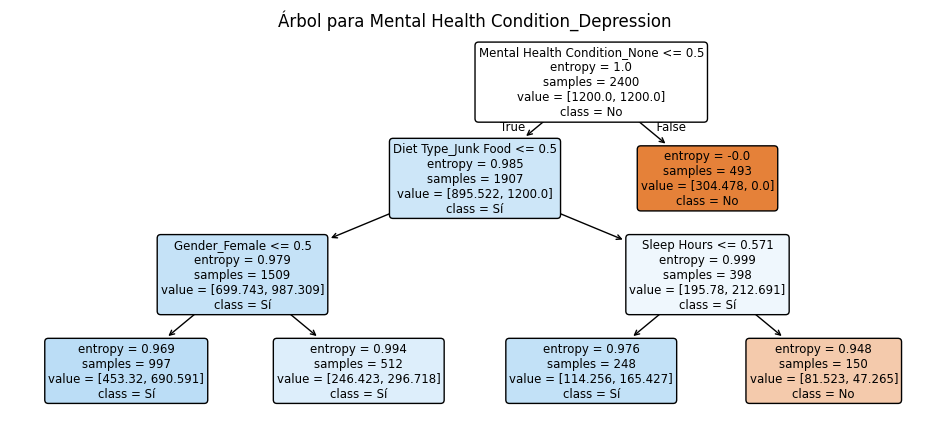


Árbol para la condición: Mental Health Condition_Anxiety
Accuracy: 0.375
              precision    recall  f1-score   support

       False       1.00      0.21      0.35       477
        True       0.25      1.00      0.40       123

    accuracy                           0.38       600
   macro avg       0.62      0.61      0.37       600
weighted avg       0.85      0.38      0.36       600



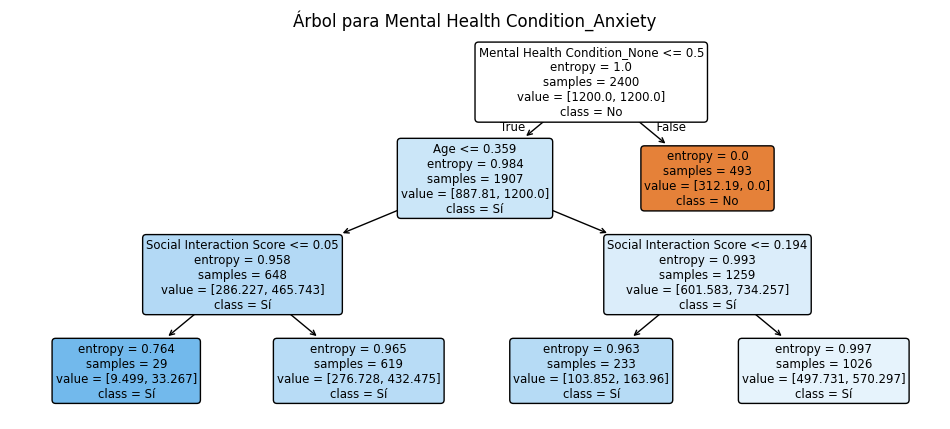


Árbol para la condición: Mental Health Condition_PTSD
Accuracy: 0.4066666666666667
              precision    recall  f1-score   support

       False       0.97      0.25      0.40       470
        True       0.26      0.97      0.41       130

    accuracy                           0.41       600
   macro avg       0.62      0.61      0.41       600
weighted avg       0.81      0.41      0.40       600



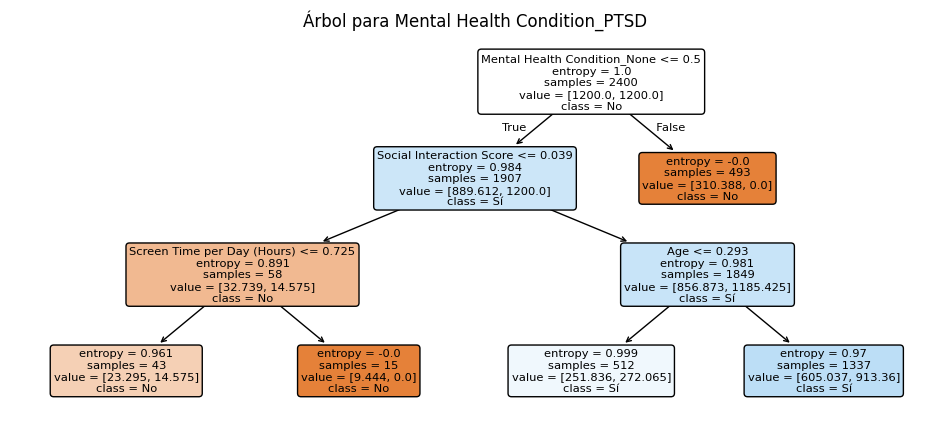


Árbol para la condición: Mental Health Condition_Bipolar
Accuracy: 0.37333333333333335
              precision    recall  f1-score   support

       False       0.96      0.22      0.36       478
        True       0.24      0.97      0.39       122

    accuracy                           0.37       600
   macro avg       0.60      0.59      0.37       600
weighted avg       0.82      0.37      0.37       600



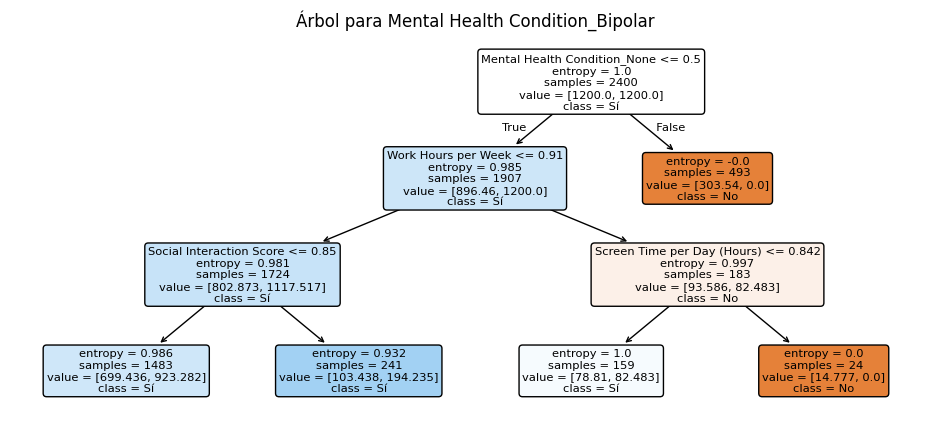

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

# Lista de condiciones mentales (ajusta los nombres según tus columnas)
condiciones = [
    'Mental Health Condition_Depression',
    'Mental Health Condition_Anxiety',
    'Mental Health Condition_PTSD',
    'Mental Health Condition_Bipolar'
]

for condicion in condiciones:
    print(f"\nÁrbol para la condición: {condicion}")
    y_cond = df[condicion]
    # Eliminar también 'Happiness Category' si existe
    drop_cols = condiciones + ['Happiness Score']
    if 'Happiness Category' in df.columns:
        drop_cols.append('Happiness Category')
    X_cond = df.drop(columns=drop_cols)

    # Separar en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_cond, y_cond, test_size=0.2, random_state=62)

    # Entrenar el árbol de decisión
    clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=69, criterion='entropy', class_weight='balanced')
    clf.fit(X_train, y_train)

    # Evaluar el modelo
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))

    # Visualizar el árbol
    plt.figure(figsize=(12, 5))
    plot_tree(clf, feature_names=X_cond.columns, class_names=['No', 'Sí'], filled=True, rounded=True)
    plt.title(f"Árbol para {condicion}")
    plt.show()